# 1. Research Space #

## 1.1 Introduction

The area of research space will be on HDB flats in Singapore.

HDB flats are public housing in Singapore. They are called as such as they are constructed by the Housing and Development Board (HDB) in Singapore. HDB flats are widely and most affordable public housing for citizens or permanent residences living in Singapore. 

There are two ways citizens are allowed to purchase HDB flats in singapore. The two are Built-to-order (BTO) flats and Resale flats. Built-to-order (BTO) flats consists of a flat allocation system that offers flexibility in timing and location for owners buying public housing in Singapore. On the other hand, resale flats are currently owned by owners who have lived in the flat for a Minimum Occupational Period (MOP) of at least 5 years before owners are allowed to sell and move out of their flats. So for example, when one buys a resale flat, he/she is taking over the propert from the previous owner. 

In Singapore, there are a wide variety options of flats that citizens are allowed to choose from. As the flat layout and floor area may vary from the different flats. The types of HDB flats in Singapore are as follows:
- Community Care Apartment 
- 2-room 
- 2-room flexi 
- 3-room 
- 4-room 
- 5-room 
- 3 Generation 
- Executive 

Apart from this, the location of the building is important as well. Such as mature and non-mature estates. Mature estates are residential areas that are more than 20 years old, while non-mature estates are less than 20 years old. Moreover, mature estates are more developed and equipped with amaneities and public transport infrastructure.

## 1.2 Aims and Objectives

Currently there is a very competitive market in the property sector espeically for home owners who would like to sell their current flats to owners who are looking for resale flats in Singapore. 

Moreover, in this discussion we will be analysing the price of the resale flats in two different estates (mature and non-mature). As well as analysing whether the maturity of the building will affect the price of the resale flat in both mature and non-mature estate. Finally we will then come to conclusion as to which HDB flat in either mature or non-mature estate will be more afforable for citizens to purchase. 

Furthermore, to simplify and and have a more detailed breakdown of the analysis, we will only be focusing on 4-room flats throughout this analysis and we will only be taking data from mature estate (Bishan) and non-mature estate (Yishun). (According to a written article by www.propertyguru.com.sg, Bishan is listed as a mature estate, while Yishun is listed as a non-mature estates). We have chosen this estate out of the many others as these two areas are relatively central parts of Singapore and yet they are not far from each other with only a distance of 11.9km between them. Which is an approximately 30 minutes drive from Bishan to Yishun, and Yishun to Bishan. Here is the article for reference: https://www.propertyguru.com.sg/property-guides/non-mature-vs-mature-bto-55760) 

## 1.3 Data 

The dataset that we will be using is from the website (www.stproperty.sg)

Below will be the two websites that we will be webscraping the latest data from to do the analysis. 

Bishan 
-  https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=3&page=2

Yishun
- https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=27

## 1.4 Relevancy of data

The data was taken from the website 
- https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=3&page=2
- https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=27

Stproperty is one of the website that is widely known in getting data for its accurate and unbiased price-taking of the HDB flats in Singapore. The website contains publicly and useful data that everyone can access. One of such is the details of the type of HDB flat. Information like these are fundamental for our research and it will be used to analyse the prices and the original year of when the house was constructed. These helps us to come to a conclusion on the purchase of resale flats in Singapore.

## 1.5 Limitation and constraint of data 

The data that is used in project is simply a rough estimate across different platform. The analysis done in our project only pertains to the data from STProperty. Since the aim is to eventually purchase a public flat in Singapore, we would be able to narrow down certain options by the end of the project. However, since our data is specific to STProperty, we would not be able to use our result to begin purchasing HDB flats in Singapore. 

## 1.6 Ethical Considerations 

The website that I use for my data, allows web scraping to be done. STproperty is a website that is free for everyone to access and under the terms and conditions, there was no clause foridding the web scrapping. 

## 1.7 Modifications 

Before analysing the data, the data will be cleaned. We will check through the data to see if there are any missing values. The data will be modified before graphs are plotted. Unnecessary informations will be removed in the data if not needed for the analysis so that we are able to be constant in the data and to keep the data clean and easily readable. Such that for every analysis, a new dataframe will be made with only the required information for the analysis. 

# 2. Webscraping data to csv files #

In this section we will be webscraping data from the website mentioned above to collect the data for our analysis and will be converted into csv files for safe keeping. 

The reason we are doing it this way is so that we can prevent the lost of data in the website in any case there are any changes made to the website after we have webscrape the data. Hence, to prevent that from happening, we will be extracting the data from the website and converting it into a csv file and then we will be reading the data directly from the csv file that we have created with our extracted data. 

Below will be the the steps that we will take to extract and collect our data. 

## 2.1 Importing libraries 



Required libraries, such as pandas and numpy are imported. 

In [1]:
import pandas as pd 
import numpy as np 
import requests 
from csv import writer
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

## 2.2 Scraping of the data

In this section, we will be scraping 2 different types of data from the website listed below. One from Bishan and the other one will be Yishun. 

### 2.2.1 Webscraping Bishan 4R flat at a Mature estate 

#### Get the URL website

In [7]:
#Bishan 4-room flat 
url = "https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=3&page=2"

#### Make a request to the website 

If response is 200, it means that we are good to go.

In [8]:
webpage = requests.get(url)
print(webpage)

ConnectionError: HTTPSConnectionPool(host='www.stproperty.sg', port=443): Max retries exceeded with url: /singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=3&page=2 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000020D183F70A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

#### Make functions to scrape the data

In this section, we will create an object soup and we will extract the target HDB flat data from the entire HTML data obtained by soup. There are 4 target columns that we will extract and they are as follows: 

1. Title - Address of the HDB flat 
2. Type - The year the HDB is constructed in 
3. Values - The details of the HDB flat 
4. Price - HDB flat price 

In [4]:
soup = BeautifulSoup(webpage.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

for list in lists:
    Title = list.find('a', {'class':'listingDetailTitle'})
    Type = list.find('div', {'class':'listingDetailType'})
    Values = list.find('div', {'listingDetailValues'})
    Price = list.find('div', {'listingDetailPrice adjusted-line-height'})
    info = [Title, Type, Values, Price]
    print(info)

NameError: name 'webpage' is not defined

Now that we have webscrape our dataset into python, we can start to clear and clean all unnecessary informations that we do not need in our dataset. To make our dataset more neat and clean, so that it is easily readable and can be used for plotting at a later stage.  

#### Removing all unnecessary informations - Cleaning and data processing

In [101]:
soup = BeautifulSoup(webpage.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

for list in lists:
    Title = list.find('a', {'class':'listingDetailTitle'}).text.replace('\n', '').replace('\t', '')
    Type = list.find('div', {'class':'listingDetailType'}).text.replace('\n', '').replace('\t', '')
    Values = list.find('div', {'listingDetailValues'}).text.replace('\n', '').replace('\t', '')
    Price = list.find('div', {'listingDetailPrice adjusted-line-height'}).text.replace('\n', '').replace('\t', '')
    info = [Title, Type, Values, Price]
    print(info)

['Blk 149 Bishan Green', '4 Room •Simplified • Built-1987', '84 sqm / $591 psf(Built)', '$535,000']
['Blk 163 Bishan Street 13', '4 Room •Built-1988', '131 sqm / $695 psf(Built)', '$980,000']
['Blk 109 Bishan View', '4 Room •Model A • Built-1985', '104 sqm / $623 psf(Built)', '$698,000']
['Blk 148 Bishan Green', '4 Room •Built-1987', '122 sqm / $567 psf(Built)', '$745,000']
['Blk 136 Bishan Green', '4 Room •Simplified • Built-1987', '92 sqm / $505 psf(Built)', '$499,999']
['Blk 111 Bishan View', '4 Room •Simplified • Built-1986', '90 sqm / $676 psf(Built)', '$655,000']
['Blk 248 Bishan Street 22', '4 Room •Model A • Built-1992', '114 sqm / $529 psf(Built)', '$650,000']
['Blk 176 Bishan Street 13', '4 Room •Built-1988', '88 sqm / $718 psf(Built)', '$680,000']
['Blk 185 Bishan Street 13', '4 Room •Simplified • Built-1988', '83 sqm / $705 psf(Built)', '$630,000']
['Blk 252 Bishan Street 22', '4 Room •Model A • Built-1992', '104 sqm / $737 psf(Built)', '$825,000']
['Blk 147 Bishan Street 1

In [102]:
soup = BeautifulSoup(webpage.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

for list in lists:
    Title = list.find('a', {'class':'listingDetailTitle'}).text.replace('\n', '').replace('\t', '')
    Type = list.find('div', {'class':'listingDetailType'}).text.replace('\n', '').replace('\t', '').replace('4 Room', '').replace('•', '').replace('New Generation', '').replace('Model A', '').replace('Simplified','').replace('Improved','').replace('Built-','').replace('Premium Apartment','')
    Values = list.find('div', {'listingDetailValues'}).text.replace('\n', '').replace('\t', '')
    Price = list.find('div', {'listingDetailPrice adjusted-line-height'}).text.replace('\n', '').replace('\t', '').replace('$','').replace(',','')
    info = [Title, Type, Values, Price]
    print(info)   


['Blk 149 Bishan Green', '   1987', '84 sqm / $591 psf(Built)', '535000']
['Blk 163 Bishan Street 13', ' 1988', '131 sqm / $695 psf(Built)', '980000']
['Blk 109 Bishan View', '   1985', '104 sqm / $623 psf(Built)', '698000']
['Blk 148 Bishan Green', ' 1987', '122 sqm / $567 psf(Built)', '745000']
['Blk 136 Bishan Green', '   1987', '92 sqm / $505 psf(Built)', '499999']
['Blk 111 Bishan View', '   1986', '90 sqm / $676 psf(Built)', '655000']
['Blk 248 Bishan Street 22', '   1992', '114 sqm / $529 psf(Built)', '650000']
['Blk 176 Bishan Street 13', ' 1988', '88 sqm / $718 psf(Built)', '680000']
['Blk 185 Bishan Street 13', '   1988', '83 sqm / $705 psf(Built)', '630000']
['Blk 252 Bishan Street 22', '   1992', '104 sqm / $737 psf(Built)', '825000']
['Blk 147 Bishan Street 11', ' 1987', '121 sqm / $692 psf(Built)', '900000']
['Blk 111 Bishan View', '   1986', '104 sqm / $526 psf(Built)', '590000']
['Blk 292 Bishan Street 22', '   1998', '100 sqm / $741 psf(Built)', '798000']
['Blk 25 Sin 

Now that we have further removed from all the unnecessary data that is not needed for our analysis, we an now extract these data and export them to a csv file. 

### Export to csv file - Bishan 

In [103]:
soup = BeautifulSoup(webpage.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

with open('bishan4R.csv', 'w', encoding='utf-8', newline='') as f: #open and closes automatically 
    thewriter = writer(f)  #f is the file function we give 
    header = ['Title', 'Type', 'Values', 'Price']
    thewriter.writerow(header)
    
    for list in lists:
        Title = list.find('a', {'class':'listingDetailTitle'}).text.replace('\n', '').replace('\t', '')
        Type = list.find('div', {'class':'listingDetailType'}).text.replace('\n', '').replace('\t', '').replace('4 Room', '').replace('•', '').replace('New Generation', '').replace('Model A', '').replace('Simplified','').replace('Improved','').replace('Built-','').replace('Premium Apartment','')
        Values = list.find('div', {'listingDetailValues'}).text.replace('\n', '').replace('\t', '')
        Price = list.find('div', {'listingDetailPrice adjusted-line-height'}).text.replace('\n', '').replace('\t', '').replace('$', '').replace(',', '')
        
        info = [Title, Type, Values, Price]
        thewriter.writerow(info)

This is the last step where the csv file has been created and has been exported into the file that we have created. 

#### Converting webscraping csv files into Dataframe - Bishan

Now that we have scrape the data, it is time to make them into a dataframe format.

In [104]:
import pandas as pd
import numpy as np 

bishan = pd.read_csv('bishan4R.csv')
bishan = bishan[['Title', 'Type', 'Values', 'Price']]
bishan.head()


,Title,Type,Values,Price
0,Blk 149 Bishan Green,1987,84 sqm / $591 psf(Built),535000
1,Blk 163 Bishan Street 13,1988,131 sqm / $695 psf(Built),980000
2,Blk 109 Bishan View,1985,104 sqm / $623 psf(Built),698000
3,Blk 148 Bishan Green,1987,122 sqm / $567 psf(Built),745000
4,Blk 136 Bishan Green,1987,92 sqm / $505 psf(Built),499999


In [105]:
bishan

,Title,Type,Values,Price
0,Blk 149 Bishan Green,1987,84 sqm / $591 psf(Built),535000
1,Blk 163 Bishan Street 13,1988,131 sqm / $695 psf(Built),980000
2,Blk 109 Bishan View,1985,104 sqm / $623 psf(Built),698000
3,Blk 148 Bishan Green,1987,122 sqm / $567 psf(Built),745000
4,Blk 136 Bishan Green,1987,92 sqm / $505 psf(Built),499999
5,Blk 111 Bishan View,1986,90 sqm / $676 psf(Built),655000
6,Blk 248 Bishan Street 22,1992,114 sqm / $529 psf(Built),650000
7,Blk 176 Bishan Street 13,1988,88 sqm / $718 psf(Built),680000
8,Blk 185 Bishan Street 13,1988,83 sqm / $705 psf(Built),630000
9,Blk 252 Bishan Street 22,1992,104 sqm / $737 psf(Built),825000


### 2.2.2 Webscraping Yishun 4R flat at a Non-mature estate 

Everything else repeats the same as how we did for Bishan.

#### Importing the library

In [106]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import requests  
from csv import writer
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#### Get the url

In [107]:
#Yishun 4-room flat 
url = "https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=27"

#### Make a requests to the website

If response is 200 means that we are good to go.

In [108]:
page = requests.get(url)
print(page)

<Response [200]>


#### Make functions to scrape the data 

In this section, we will create an object soup and we will extract the target HDB flat data from the entire HTML data obtained by soup. There are 4 target columns that we will extract and they are as follows: 

1. Title - Address of the HDB flat 
2. Type - The year the HDB is constructed in 
3. Values - The details of the HDB flat 
4. Price - HDB flat price 

In [109]:
soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

for list in lists:
    Title = list.find('a', {'class':'listingDetailTitle'})
    Type = list.find('div', {'class':'listingDetailType'})
    Values = list.find('div', {'listingDetailValues'})
    Price = list.find('div', {'listingDetailPrice adjusted-line-height'})
    info = [Title, Type, Values, Price]
    print(info)

[<a class="listingDetailTitle" href="/listings/98348191/for-sale-yishun-central-yishun-central" target="_blank">
<span class="notranslate">Blk 302 Yishun Central</span>
</a>, <div class="listingDetailType">
<span>4 Room</span> <span>•</span>
							Model A <span>•</span> <span>Built-1988</span>
</div>, <div class="listingDetailValues">
									104 sqm / $464 psf(Built)</div>, <div class="listingDetailPrice adjusted-line-height">
									$520,000</div>]
[<a class="listingDetailTitle" href="/listings/98206241/for-sale-angsana-breeze-yishun-4a-506c-yishun-ave-4" target="_blank">
<span class="notranslate">Blk 506C Angsana Breeze @ Yishun</span>
</a>, <div class="listingDetailType">
<span>4 Room</span> <span>•</span>
							Model A <span>•</span> <span>Built-2018</span>
</div>, <div class="listingDetailValues">
									93 sqm / $564 psf(Built)</div>, <div class="listingDetailPrice adjusted-line-height">
									$565,000</div>]
[<a class="listingDetailTitle" href="/listings/98246811/for-

Now that we have webscrape our dataset into python, we can start to clear and clean all unnecessary informations that we do not need in our dataset. To make our dataset more neat and clean, so that it is easily readable and can be used for plotting at a later stage.  

#### Remove all unnecessary informations - Cleaning and data processing

In [110]:
soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

for list in lists:
    Title = list.find('a', {'class':'listingDetailTitle'}).text.replace('\n', '').replace('\t', '')
    Type = list.find('div', {'class':'listingDetailType'}).text.replace('\n', '').replace('\t', '')
    Values = list.find('div', {'listingDetailValues'}).text.replace('\n', '').replace('\t', '')
    Price = list.find('div', {'listingDetailPrice adjusted-line-height'}).text.replace('\n', '').replace('\t', '')
    info = [Title, Type, Values, Price]
    print(info)

['Blk 302 Yishun Central', '4 Room •Model A • Built-1988', '104 sqm / $464 psf(Built)', '$520,000']
['Blk 506C Angsana Breeze @ Yishun', '4 Room •Model A • Built-2018', '93 sqm / $564 psf(Built)', '$565,000']
['Blk 264 Yishun Street 22', '4 Room •Model A • Built-1986', '104 sqm / $442 psf(Built)', '$494,900']
['Blk 312 Yishun Ring Road', '4 Room •Simplified • Built-1987', '84 sqm / $470 psf(Built)', '$425,000']
['Blk 117 Yishun Ring Road', '4 Room •Built-1983', '104 sqm / $428 psf(Built)', '$480,000']
['Blk 348A Adora Green', '4 Room •Premium Apartment • Built-2013', '92 sqm / $656 psf(Built)', '$650,000']
['Blk 407 Yishun Avenue 6', '4 Room •Simplified • Built-1988', '84 sqm / $448 psf(Built)', '$405,000']
['Blk 346 Yishun Avenue 11', '4 Room •Built-1988', '104 sqm / $420 psf(Built)', '$470,000']
['Blk 870 Yishun Street 81', '4 Room •Model A • Built-1987', '104 sqm / $464 psf(Built)', '$520,000']
['Blk 870 Yishun Street 81', '4 Room •Model A • Built-1987', '104 sqm / $464 psf(Built)',

In [111]:
soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

for list in lists:
    Title = list.find('a', {'class':'listingDetailTitle'}).text.replace('\n', '').replace('\t', '')
    Type = list.find('div', {'class':'listingDetailType'}).text.replace('\n', '').replace('\t', '').replace('4 Room', '').replace('•', '').replace('New Generation', '').replace('Model A', '').replace('Simplified','').replace('Improved','').replace('Built-','').replace('Premium Apartment','')
    Values = list.find('div', {'listingDetailValues'}).text.replace('\n', '').replace('\t', '')
    Price = list.find('div', {'listingDetailPrice adjusted-line-height'}).text.replace('\n', '').replace('\t', '').replace('$', '').replace(',', '')
    info = [Title, Type, Values, Price]
    print(info)

['Blk 302 Yishun Central', '   1988', '104 sqm / $464 psf(Built)', '520000']
['Blk 506C Angsana Breeze @ Yishun', '   2018', '93 sqm / $564 psf(Built)', '565000']
['Blk 264 Yishun Street 22', '   1986', '104 sqm / $442 psf(Built)', '494900']
['Blk 312 Yishun Ring Road', '   1987', '84 sqm / $470 psf(Built)', '425000']
['Blk 117 Yishun Ring Road', ' 1983', '104 sqm / $428 psf(Built)', '480000']
['Blk 348A Adora Green', '   2013', '92 sqm / $656 psf(Built)', '650000']
['Blk 407 Yishun Avenue 6', '   1988', '84 sqm / $448 psf(Built)', '405000']
['Blk 346 Yishun Avenue 11', ' 1988', '104 sqm / $420 psf(Built)', '470000']
['Blk 870 Yishun Street 81', '   1987', '104 sqm / $464 psf(Built)', '520000']
['Blk 870 Yishun Street 81', '   1987', '104 sqm / $464 psf(Built)', '520000']
['Blk 304 Yishun Central', '   1988', '104 sqm / $487 psf(Built)', '545000']
['Blk 838 Yishun Street 81', '   1987', '104 sqm / $534 psf(Built)', '598000']
['Blk 817 Yishun Street 81', '   1987', '104 sqm / $445 psf(B

Now that we have removed from all the unnecessary data that is not needed for our analysis, we an now extract these data and export them to a csv file. 

### Export to csv file - Yishun

In [112]:
soup = BeautifulSoup(page.content, 'html.parser')
lists = soup.find_all('div', {'class':'row listingDetailsInfo'})

with open('Yishun4R.csv', 'w', encoding='utf-8', newline='') as f: #open and closes automatically 
    thewriter = writer(f)  #f is the file function we give 
    header = ['Title', 'Type', 'Values', 'Price']
    thewriter.writerow(header)
    
    for list in lists:
        Address = list.find('a', {'class':'listingDetailTitle'}).text.replace('\n', '').replace('\t', '')
        Type = list.find('div', {'class':'listingDetailType'}).text.replace('\n', '').replace('\t', '').replace('4 Room', '').replace('•', '').replace('New Generation', '').replace('Model A', '').replace('Simplified','').replace('Improved','').replace('Built-','').replace('Premium Apartment','')
        Values = list.find('div', {'listingDetailValues'}).text.replace('\n', '').replace('\t', '')
        Price = list.find('div', {'listingDetailPrice adjusted-line-height'}).text.replace('\n', '').replace('\t', '').replace('$','').replace(',','')
        
        info = [Address, Type, Values, Price]
        thewriter.writerow(info)

This is the last step were the csv file has been created and it is in the folder that we have created. 

### Converting webscraping csv files into dataframe - Yishun

Now that we have scrape the data, it is time to make them into a dataframe format.

In [113]:
import pandas as pd
import numpy as np 

yishun = pd.read_csv('yishun4R.csv')
yishun = yishun[['Title', 'Type', 'Values', 'Price']]
yishun.head()


,Title,Type,Values,Price
0,Blk 302 Yishun Central,1988,104 sqm / $464 psf(Built),520000
1,Blk 506C Angsana Breeze @ Yishun,2018,93 sqm / $564 psf(Built),565000
2,Blk 264 Yishun Street 22,1986,104 sqm / $442 psf(Built),494900
3,Blk 312 Yishun Ring Road,1987,84 sqm / $470 psf(Built),425000
4,Blk 117 Yishun Ring Road,1983,104 sqm / $428 psf(Built),480000


In [114]:
yishun

,Title,Type,Values,Price
0,Blk 302 Yishun Central,1988,104 sqm / $464 psf(Built),520000
1,Blk 506C Angsana Breeze @ Yishun,2018,93 sqm / $564 psf(Built),565000
2,Blk 264 Yishun Street 22,1986,104 sqm / $442 psf(Built),494900
3,Blk 312 Yishun Ring Road,1987,84 sqm / $470 psf(Built),425000
4,Blk 117 Yishun Ring Road,1983,104 sqm / $428 psf(Built),480000
5,Blk 348A Adora Green,2013,92 sqm / $656 psf(Built),650000
6,Blk 407 Yishun Avenue 6,1988,84 sqm / $448 psf(Built),405000
7,Blk 346 Yishun Avenue 11,1988,104 sqm / $420 psf(Built),470000
8,Blk 870 Yishun Street 81,1987,104 sqm / $464 psf(Built),520000
9,Blk 870 Yishun Street 81,1987,104 sqm / $464 psf(Built),520000


Now all my data has been converted into a dataframe so whenever we call bishan or yishun, all the data will be shown in the list. So now we can move on to the simple data analysis part of this project. At the end of this project, we will also touch on the exploratory data analysis (EDA) of this project. 

# 3. Simple data analysis

In this section, we will perform simple analysis on the dataframe to assess whether further data processing is required before we start the exploratory data analaysis. We can also easily call out bishan and yishun to print the dataframe that we want to analyse the datasets. 

## 3.1 Top 10 data 

The command below will show the top 10 data in the dataframe for both Bishan and Yishun.

In [115]:
import pandas as pd 
bishan.head(10)

,Title,Type,Values,Price
0,Blk 149 Bishan Green,1987,84 sqm / $591 psf(Built),535000
1,Blk 163 Bishan Street 13,1988,131 sqm / $695 psf(Built),980000
2,Blk 109 Bishan View,1985,104 sqm / $623 psf(Built),698000
3,Blk 148 Bishan Green,1987,122 sqm / $567 psf(Built),745000
4,Blk 136 Bishan Green,1987,92 sqm / $505 psf(Built),499999
5,Blk 111 Bishan View,1986,90 sqm / $676 psf(Built),655000
6,Blk 248 Bishan Street 22,1992,114 sqm / $529 psf(Built),650000
7,Blk 176 Bishan Street 13,1988,88 sqm / $718 psf(Built),680000
8,Blk 185 Bishan Street 13,1988,83 sqm / $705 psf(Built),630000
9,Blk 252 Bishan Street 22,1992,104 sqm / $737 psf(Built),825000


In [116]:
yishun.head(10)

,Title,Type,Values,Price
0,Blk 302 Yishun Central,1988,104 sqm / $464 psf(Built),520000
1,Blk 506C Angsana Breeze @ Yishun,2018,93 sqm / $564 psf(Built),565000
2,Blk 264 Yishun Street 22,1986,104 sqm / $442 psf(Built),494900
3,Blk 312 Yishun Ring Road,1987,84 sqm / $470 psf(Built),425000
4,Blk 117 Yishun Ring Road,1983,104 sqm / $428 psf(Built),480000
5,Blk 348A Adora Green,2013,92 sqm / $656 psf(Built),650000
6,Blk 407 Yishun Avenue 6,1988,84 sqm / $448 psf(Built),405000
7,Blk 346 Yishun Avenue 11,1988,104 sqm / $420 psf(Built),470000
8,Blk 870 Yishun Street 81,1987,104 sqm / $464 psf(Built),520000
9,Blk 870 Yishun Street 81,1987,104 sqm / $464 psf(Built),520000


## 3.2 Bottom 5 data 

The command below will show the bottom 5 data in the dataframe for both Bishan and Yishun.

In [117]:
bishan.tail(5)

,Title,Type,Values,Price
15,Blk 293 Bishan Street 22,1998,102 sqm / $711 psf(Built),780000
16,Blk 441 Sin Ming Avenue,1990,114 sqm / $676 psf(Built),830000
17,Blk 501 Bishan Street 11,1989,103 sqm / $602 psf(Built),668000
18,Blk 266 Bishan Street 24,1992,112 sqm / $653 psf(Built),788000
19,Blk 122 Bishan Street 12,1986,104 sqm / $603 psf(Built),675000


In [118]:
yishun.tail(5)

,Title,Type,Values,Price
15,Blk 403 Yishun Avenue 6,1988,84 sqm / $475 psf(Built),430000
16,Blk 676A Park Grove @ Yishun,2017,93 sqm / $579 psf(Built),580000
17,Blk 446 Yishun Avenue 11,2012,92 sqm / $543 psf(Built),538000
18,Blk 349 Yishun Avenue 11,1988,108 sqm / $417 psf(Built),485000
19,Blk 287 Yishun Avenue 6,1985,104 sqm / $445 psf(Built),499000


## 3.3 Finding the Max 

The command below will show the maximum data in terms of price in the dataframe for both Bishan and Yishun.

In [119]:
# Bishan Flat 
bishan.max()

Title     Blk 501 Bishan Street 11
Type                          1998
Values    92 sqm / $505 psf(Built)
Price                       980000
dtype: object

In [120]:
# Yishun Flat 
yishun.max()

Title     Blk 870 Yishun Street 81
Type                          2018
Values    93 sqm / $579 psf(Built)
Price                       650000
dtype: object

From the above results, we can tell that there is a huge differnce in price of $250,000 and a difference of only 1 sqm between the flat in Bishan and Yishun. 

## 3.4 Finding the Min

The command below will show the minimum data in terms of price in the dataframe for both Bishan and Yishun.

In [121]:
# Bishan Flat 
bishan.min()

Title           Blk 109 Bishan View
Type                           1974
Values    100 sqm / $741 psf(Built)
Price                        455000
dtype: object

In [122]:
# Yishun Flat 
yishun.min()

Title      Blk 117 Yishun Ring Road
Type                           1983
Values    104 sqm / $420 psf(Built)
Price                        405000
dtype: object

## 3.5 Finding the mean 

The below code and results will show the mean price of all data of both Bishan flats and Yishun flats. This will then be the average price of the flat between the 19 flats of data that we have collected. 

In [123]:
# Bishan flat 
bishan["Price"].mean()

709099.95

In [124]:
# Yishun flat 
yishun["Price"].mean()

512345.0

From the results above, we can conclude that Bishan has a higher mean price compared to Yishun which also means that purchasing a flat in Bishan (Mature estate) will cost higher than purchasing a flat in Yishun (Non-mature estate). 

## 3.5 Finding the details of Type and Price

The below code and results will show the detailed description of the Type and Price data collected for both Bishan and Yishun. 

In [125]:
bishan.describe()

,Type,Price
count,20.000000,20.000000
mean,1988.900000,709099.950000
std,5.418293,132956.308257
min,1974.000000,455000.000000
25%,1986.750000,645000.000000
50%,1988.000000,689000.000000
75%,1992.000000,798500.000000
max,1998.000000,980000.000000


In [126]:
yishun.describe()

,Type,Price
count,20.000000,20.000000
mean,1994.100000,512345.000000
std,12.735776,62315.846384
min,1983.000000,405000.000000
25%,1987.000000,477500.000000
50%,1988.000000,509500.000000
75%,1994.000000,550000.000000
max,2018.000000,650000.000000


## 3.6 Dataset Description 

In [127]:
# Bishan Flat 
bishan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   20 non-null     object
 1   Type    20 non-null     int64 
 2   Values  20 non-null     object
 3   Price   20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


In [128]:
# Yishun Flat
yishun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   20 non-null     object
 1   Type    20 non-null     int64 
 2   Values  20 non-null     object
 3   Price   20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


# 4. Exploratory data analysis

In this section, we will be analysing more in-depth about the data that we have collected. As mentioned above, our aim is to analysing the price of the resale flats in two different estates (mature and non-mature). As well as analysing whether the maturity of the building will affect the price of the resale flat in both mature and non-mature estate. 

### Find out whether the old or new building constructed has a huge difference in price, or the price difference is not much

- Comparing the data of when it is build to the price of the flat, whether the price of the flat is affected by when the building is being build such that is it because the building is old so the price is high or is it because the building is new so the price is high, we are thus comparing newly build hdb flats to old build hdb flats whether there is a huge difference in price in both mature (bishan) and non-mature (yishun) estates. 

- In this section we will be analysing more in-depth about the resale HDB flats

## 4.1 Creating a new variable 

A new dataframe is created with the columns of Type and Price from the dataframe bishan and yishun separately. This is to get rid of all the other unncessary informations from the original dataframe bishan and yishun for this part of the analysis. 

In [129]:
bishan_price = bishan[["Type", "Price"]]
bishan_price

,Type,Price
0,1987,535000
1,1988,980000
2,1985,698000
3,1987,745000
4,1987,499999
5,1986,655000
6,1992,650000
7,1988,680000
8,1988,630000
9,1992,825000


In [130]:
yishun_price = bishan[["Type", "Price"]]
yishun_price

,Type,Price
0,1987,535000
1,1988,980000
2,1985,698000
3,1987,745000
4,1987,499999
5,1986,655000
6,1992,650000
7,1988,680000
8,1988,630000
9,1992,825000


## 4.2 Analysis of pricing difference in Mature and Non-mature estates and which is more affordable to purchase. 

Plotting a bar graph with Type as the x-axis and the Price as the y-axis. This is to show the price of the HDB flat of every year it is being constructed in the form of a bar graph. 

<AxesSubplot:ylabel='Type'>

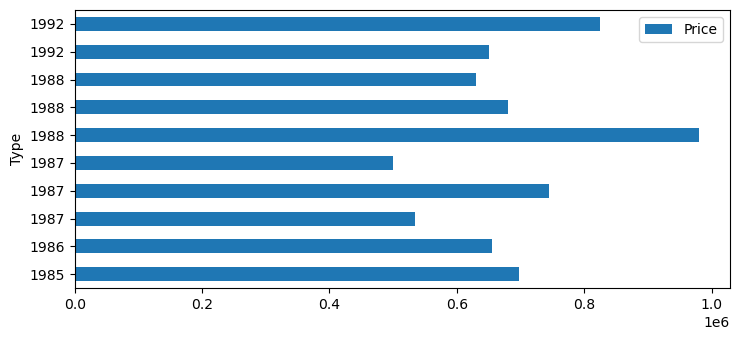

In [131]:
# Bishan Flat 
bishan_price.head(10).sort_values(by="Type", ascending=True).plot(kind="barh", x="Type", y="Price")
# Change the colour of the barh graph 

<AxesSubplot:ylabel='Type'>

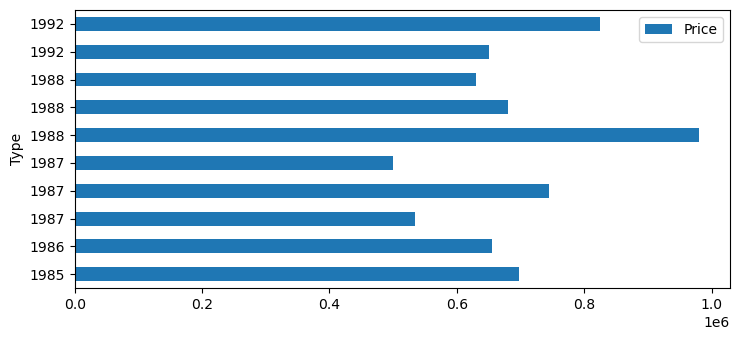

In [132]:
# Yishun Flat 
yishun_price.head(10).sort_values(by="Type", ascending=True).plot(kind="barh", x="Type", y="Price")
# change the colour of the barh group / change the theme if possible 

- From the above results, if we were to compare the year 1987 and 1988 for both Bishan (Mature estate) and Yishun (Non-mature estate) we can see that there is a difference of price in the reslae flats.
- With these 10 extracted data from the rest of the other datas, most flats in Bishan (Mature estate) pricing ranges between 600,0000 to 800,000. Meanwhile the flats in Yishun (Non-mature estate) pricing ranges between 400,000 to 600,000. From here we can somwewhat conclude that purchasing a house in the non-mature estate would be more afforable.

## 4.3 Analysis of year the building constructed in to having affects on the price of the HDB flat in mature and non-mature estates.

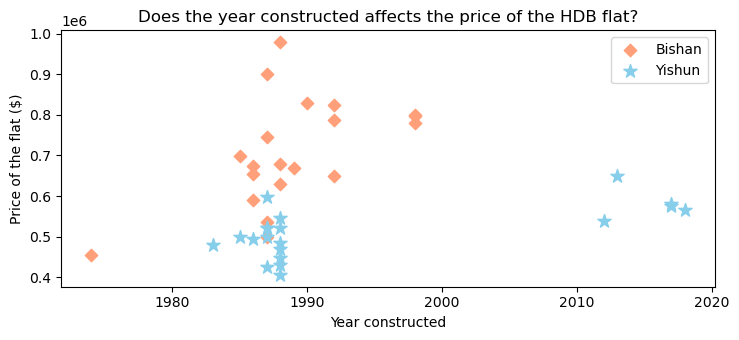

In [133]:
import matplotlib.pyplot as plt

# x-axis values
x1 = bishan["Type"]
# y-axis values
y1 = bishan["Price"]

# plotting points as a scatter plot
plt.scatter(x1, y1, label= "Bishan", color= "lightsalmon",
			marker= "D", s=40)

# x-axis values
x2 = yishun["Type"]
# y-axis values
y2 = yishun["Price"]

# plotting points as a scatter plot
plt.scatter(x2, y2, label= "Yishun", color= "skyblue",
			marker= "*", s=100)


# x-axis label
plt.xlabel("Year constructed")
# frequency label
plt.ylabel("Price of the flat ($)")
# plot title
plt.title("Does the year constructed affects the price of the HDB flat?")
# showing legend
plt.legend()

# function to show the plot
plt.show()

- From here we can tell that Bishan flats which are in the mature estates, pricing of the HDB are in the higher range compared to Yishun which is in the non-mature estate. 
- We can also tell that the age of the HDB flat and when it is constructed does not greatly affect the pricing of the flat such that aroun the year 1988, that is when the houses are in high price especially in the mature estate (Bishan) compared to Yishun and compared to relatively newly built HDB flats in 2010 and later the price does not affect. 
- From here we can conclude that whether the hdb flat is a newly built flat or a flat that is constructed more than 20 years ago, the price of the flat is still soaring high and that the age of the flat does not affect the price of the flat. However, the location of the flat such that whether it is in a mature or non-mature estate, does affect the price of the flat. 

1e6 is equivalent to 100000, so 0.9 is equivalent to 900000 and so on for the rest of the numbers...

# 5. Summary

## 5.1 Conclusions

In conclusion, we should opt to look at purchasing HDB resale flats in non-mature estate which are building built less than 20 years to stay in. As resale flats can be sold and repurchase anytime after the owners have completed their minimum occupational period of the house.  

# 6. References and Resources 

### 6.1 References and Resources used

Webscraping of data for resale flat prices in Singapore taken from the website:

Webscraping 

For Bishan (Mature estate):
- https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=3&page=2

For Yishun (Non-mature estate):
- https://www.stproperty.sg/singapore-property-listings/hdb-for-sale?cdResearchSubTypes=2&selectedHdbTownIds=27


Other resources referred to: 
- https://www.youtube.com/watch?v=RvCBzhhydNk
- https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
- https://realpython.com/pandas-plot-python/
- https://matplotlib.org/3.3.3/api/markers_api.html
- https://en.wikipedia.org/wiki/Build_to_order_(HDB)
- https://www.propertyguru.com.sg/property-guides/non-mature-vs-mature-bto-55760
